In [1]:
#Scraping the novel Moby Dick

In [2]:

#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit

import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud

In [3]:
#we are using request package to make a GET request for the website, which means we're getting data from it.

r=requests.get('https://www.gutenberg.org/files/2701/2701-h/2701-h.htm')

In [4]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [5]:
#Extracting the HTML from the request object
html = r.text

In [6]:
# Printing the first 500 characters in html
print(html[:500])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#ffffff; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .2


In [7]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

In [8]:
#total length
len(text)

1384305

In [9]:
print(text[10000:11000])

   and sung of Leviathan, by many nations and generations, including our
        own.
      

        So fare thee well, poor devil of a Sub-Sub, whose commentator I am. Thou
        belongest to that hopeless, sallow tribe which no wine of this world
        will ever warm; and for whom even Pale Sherry would be too rosy-strong;
        but with whom one sometimes loves to sit, and feel poor-devilish, too;
        and grow convivial upon tears; and say to them bluntly, with full eyes
        and empty glasses, and in not altogether unpleasant sadness—Give
        it up, Sub-Subs! For by how much the more pains ye take to please the
        world, by so much the more shall ye for ever go thankless! Would that I
        could clear out Hampton Court and the Tuileries for ye! But gulp down
        your tears and hie aloft to the royal-mast with your hearts; for your
        friends who have gone before are clearing out the seven-storied heavens,
        and making refugees 


In [10]:
#The text of the novel contains a lot of unwanten stuff, we need to remove them
#We will start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) 
#Then then split the text into a list of words

In [11]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [12]:
#Tokenizing the text
tokens = tokenizer.tokenize(text)

In [13]:
len(tokens)

222826

In [14]:
print(tokens[0:10])

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville', 'body', 'background']


In [15]:
print(tokens[100:110])

['toc', 'margin', 'left', '10', 'margin', 'bottom', '75em', 'toc2', 'margin', 'left']


In [16]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [17]:
len(words)

222826

In [18]:
print(words[0:10])

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville', 'body', 'background']


In [19]:
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.

In [20]:
#English stop words from nltk

stopwords = nltk.corpus.stopwords.words('english')

In [21]:
print(stopwords[0:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [22]:
#Now we need to remove the stop words from the words variable

#A new list to hold Moby Dick with No Stop words
words_new = []

#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [23]:
len(words_new)

113413

In [24]:
print(words_new[0:10])

['moby', 'dick', 'whale', 'herman', 'melville', 'body', 'background', 'ffffff', 'color', 'black']


In [25]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

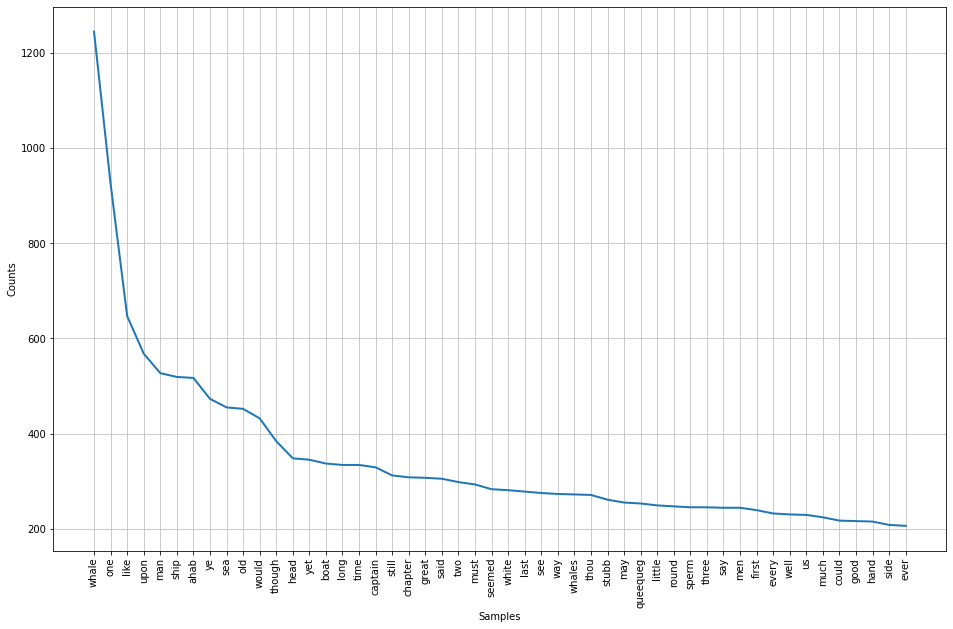

In [26]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(50)

# Working on some Word Clouds

In [27]:
#converting into string

res=' '.join([i for i in words_new if not i.isdigit()]) 

In [28]:
res[0:100]

'moby dick whale herman melville body background ffffff color black margin left margin right text ali'

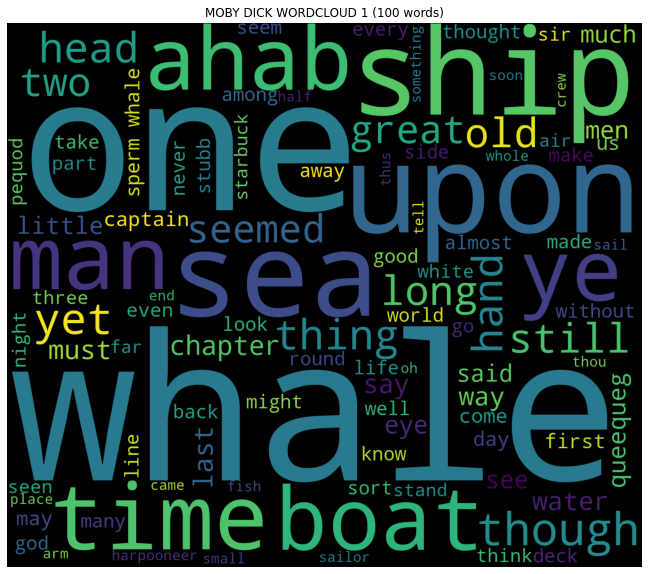

In [29]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('MOBY DICK WORDCLOUD 1 (100 words)')
plt.axis('off')
plt.show()

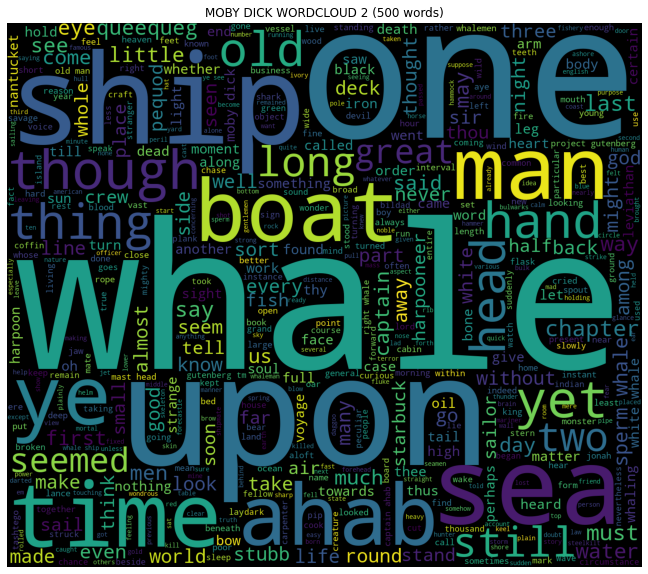

In [30]:
 plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=500,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('MOBY DICK WORDCLOUD 2 (500 words)')
plt.axis('off')
plt.show()


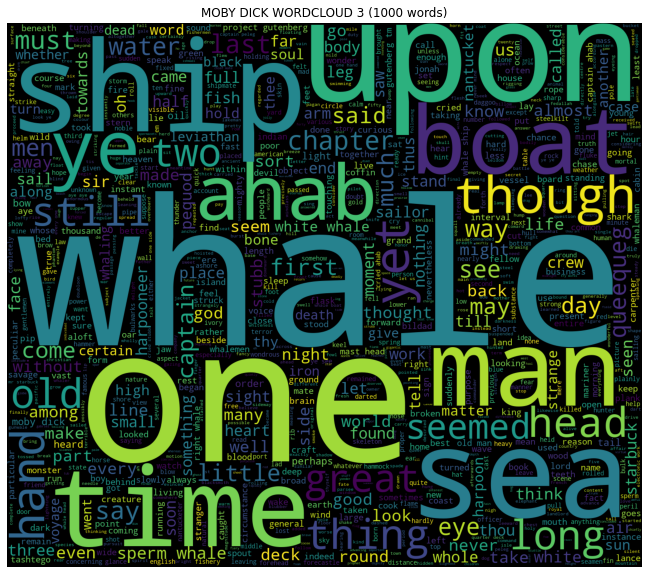

In [31]:
 plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=1000,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('MOBY DICK WORDCLOUD 3 (1000 words)')
plt.axis('off')
plt.show()
